(-0.5, 1983.5, 1115.5, -0.5)

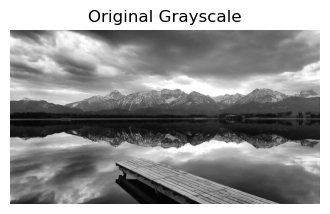

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = r'..\image.jpg'
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Cannot load image at {img_path}")
# work in grayscale for these ops
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(4,4))
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

(-0.5, 1983.5, 1115.5, -0.5)

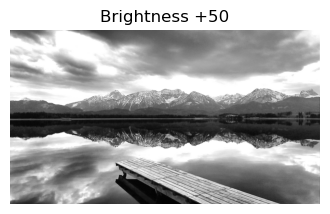

In [ ]:
# (a) Brightness increase by +50 (clipped)
bright = cv2.add(gray, 50)  
plt.figure(figsize=(4,4))
plt.imshow(bright, cmap='gray')
plt.title("Brightness +50")
plt.axis('off')


(-0.5, 1983.5, 1115.5, -0.5)

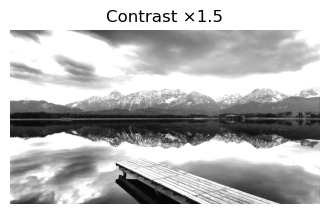

In [ ]:
# (b) Contrast enhancement: multiply by 1.5 (clipped)
contrast = cv2.multiply(gray, 1.5)
contrast = np.clip(contrast, 0, 255).astype(np.uint8)
plt.figure(figsize=(4,4))
plt.imshow(contrast, cmap='gray')
plt.title("Contrast ×1.5")
plt.axis('off')


(-0.5, 1983.5, 1115.5, -0.5)

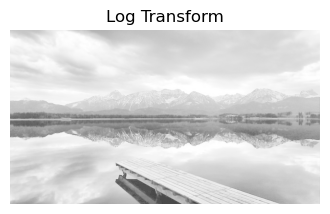

In [8]:
# — (c) Log transform: s = c·log(1 + r)
c = 255 / np.log(1 + np.max(gray))
log_transformed = (c * np.log1p(gray)).astype(np.uint8)
plt.figure(figsize=(4,4))
plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transform")
plt.axis('off')


(-0.5, 1983.5, 1115.5, -0.5)

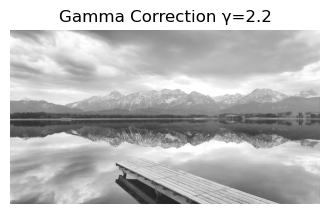

In [ ]:
# (d) Gamma correction: γ=2.2
gamma = 2.2
inv_gamma = 1.0 / gamma
# build LUT
lut = np.array([((i/255.0)**inv_gamma)*255 for i in range(256)]).astype("uint8")
gamma_corrected = cv2.LUT(gray, lut)
plt.figure(figsize=(4,4))
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Gamma Correction γ=2.2")
plt.axis('off')


(-0.5, 1983.5, 1115.5, -0.5)

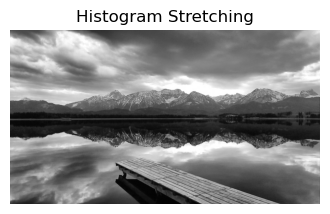

In [7]:
# (e) Histogram stretching (contrast stretching)
r_min, r_max = np.min(gray), np.max(gray)
stretched = ((gray - r_min) / (r_max - r_min) * 255).astype(np.uint8)
plt.figure(figsize=(4,4))
plt.imshow(stretched, cmap='gray')
plt.title("Histogram Stretching")
plt.axis('off')

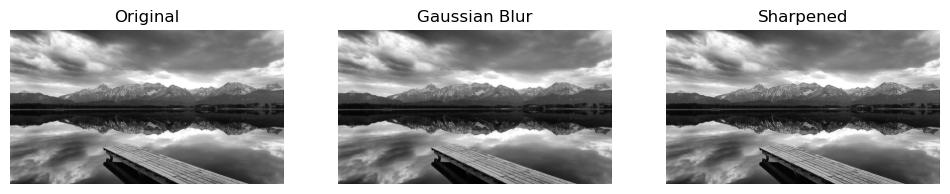

In [6]:
# — (f) Smoothing (Gaussian blur σ=1.0) & (g) Sharpening
gauss = cv2.GaussianBlur(gray, (5,5), sigmaX=1.0)
# unsharp mask
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)

# display side-by-side
fig, axes = plt.subplots(1,3, figsize=(12,4))
for ax, im, title in zip(axes, [gray, gauss, sharpen],
                         ["Original", "Gaussian Blur", "Sharpened"]):
    ax.imshow(im, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()
